In [15]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math 
import random
import scipy.io as spio
import collections
from sklearn.cluster import DBSCAN 

columns = ['coluna 1', 'coluna 2']
train = pd.read_csv("cluster.dat", decimal=".", sep=' ', names=columns)
eps = 0.005
minpts = 10

In [16]:
def normalize(data):
  normData = data.copy()
  for i in range(data.shape[1]):
    normData.iloc[:,i] /= np.linalg.norm(data.iloc[:,i])
  return normData

In [5]:
# find the close points of the current point analysed. (Euclidian referential)
def findNeighbors(data, curr_point, radius):
  points = []
  for neighbor in range(len(data)):
    if np.linalg.norm(data.iloc[neighbor]-data.iloc[curr_point]) <= radius:
      points.append(neighbor)   
  return points

In [6]:
# Expand Clusters, starting from core points
def ExpandClusters(data, adj_list, point_label, c, epsilon, newCluster):

  for p in adj_list[c]:
    # if it is a new point
    if point_label[p] != -2:  
      newCluster = ExpandClusters(data, adj_list, point_label, p, epsilon, newCluster)
      newCluster = np.append(newCluster, p)
      point_label[p] = -2
  return newCluster

In [9]:
def effDBSCAN(data, epsilon, minP):
  N = []
  S = [[]]
  core_points = []
  C = 0
  point_label = np.zeros(len(data),dtype=int) 
  adj_list = []
  # adj_list = point_label.copy()
  
  # 1- find adjacent list of points, and find the core points.
  for p in range(len(data)):
    if point_label[p] != 0: continue
    N = findNeighbors(data, p, epsilon)
    if len(N) >= minP:
      point_label[p] = -3
      core_points.append(p)
    else:
      point_label[p] = -1
    adj_list.append(N)

  print('adj list:')  
  for lin in range(len(adj_list)):
    print(str(lin)+': ' + str(adj_list[lin]))
  
  # 2- Expand Clusters, starting from the core.
  for c in core_points:
    if point_label[c] == -3: # may change during ExpandClusters
      C=C+1
      point_label[c] = C
      S.append([p])
    S = ExpandClusters(data, adj_list, point_label, c, epsilon, S[C])

  for o in range(len(point_label)):
    if point_label[o] > -2:
      S[0] = np.append(S[0],o)
  return S
  # print('Cluster '+str(p)+' (size '+str(len(S[C]))+'): '+str(S[C]))

In [10]:
#Function to plot final result
def plotRes(train, data, main_title):
  dicColors = {0:'black', 1:'orange', 2:'purple', 3:'red', 4:'blue', 5:'green', 
              6:'yellow', 7:'violet', 8:'brown'}
  V = [0] * len(train)
  for i in range(len(data)):
   for j in range(len(data[i])):
    V[data[i][j]] = i
    
  label_color = [dicColors[c%8] for c in V] 
  x_label = 'x axis'
  y_label = 'y axis'
  title = main_title 
  plt.figure(figsize=(15,15))
  plt.scatter(train.iloc[:,0],train.iloc[:,1],c=label_color,alpha=0.3)
  plt.suptitle(title, fontsize=20)
  plt.suptitle(title, fontsize=20)  
  plt.suptitle(title, fontsize=20)  
  plt.savefig(title + '.png')
  plt.show()

In [11]:
def callClusters(train_data,eps,minpts):
  print('Set epsilon (normalized radius) = ' +str(eps)+ ', Min Points = '+str(minpts))
  return effDBSCAN(train_data,eps,minpts)

In [12]:
def callPlot(train_data,pointlabel, main_title):
  cl = len(pointlabel)
  for i in range (len(pointlabel)):
    print("cluster "+str(i)+": "+str(pointlabel[i]))
  plotRes(train_data, pointlabel, main_title) 
  plt.show()
  print('number of cluster found: ' + str(cl-1))
  counter=collections.Counter(pointlabel)
  print(counter)
  outliers  = np.count_nonzero(pointlabel == 0)
  print('number of outliers found: '+str(outliers) +'\n')

In [13]:
def main():
  normTrain = normalize(train)
  pt_label = callClusters(normTrain,eps,minpts)
  callPlot(train,pt_label,
          'TRIAL Clusters division applying method DBSCAN (epsilon 0.05) - data from cluster.dat')

In [14]:
main()

Set epsilon (normalized radius) = 0.005, Min Points = 10
adj list:
0: [0, 1, 2, 3, 4, 5]
1: [0, 1, 2, 3, 4, 5, 7, 8, 9, 15]
2: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
3: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12]
4: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17]
5: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19]
6: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 17, 18]
7: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 25]
8: [1, 2, 4, 5, 7, 8, 9, 10, 13, 14, 15, 16, 25, 26, 27]
9: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 24, 25, 26]
10: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]
11: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21]
12: [2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 16, 17, 18, 19, 20, 21]
13: [8, 13, 14, 15, 25, 26, 27, 28, 29, 30, 131]
14: [7, 8, 9, 10, 13, 14, 15, 16, 19, 24, 25, 26, 27, 28, 29, 30]
15: [1, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 19, 24, 25, 26, 27, 30]
16: 

RecursionError: maximum recursion depth exceeded in comparison

In [8]:
adj_list = [[1,2],[1,11,33],[56]]
print('adj list:')  
for lin in range(len(adj_list)):
  print(str(lin)+': ' + str(adj_list[lin]))

adj list:
0: [1, 2]
1: [1, 11, 33]
2: [56]


In [17]:
normX = normalize(train)

In [18]:
clustering = DBSCAN(eps=0.5, min_samples=2).fit(normX)

In [20]:
callPlot(train,clustering,
          'TRIAL Clusters division applying method skitDBSCAN (epsilon 0.05). data from cluster.dat')

TypeError: object of type 'DBSCAN' has no len()

Automatically created module for IPython interactive environment
Estimated number of clusters: 3
Estimated number of noise points: 0


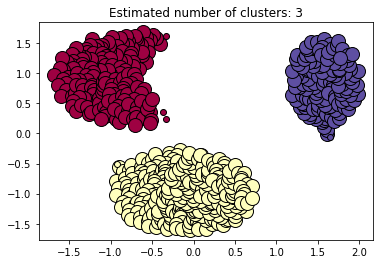

In [27]:
print(__doc__)

import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
X = StandardScaler().fit_transform(train)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(train, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(train, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(train, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(train, labels))
# print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(train, labels))
# print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()